### Questions

Dataset : https://www.kaggle.com/uciml/pima-indians-diabetes-database

1. Split the dataset (80, 20) into training and testing set.
2. Train a Linear Regression model to predict "BMI" using all other features available in the dataset.
3. Plot the "Cost function vs Iterations" curve.
4. Perform greedy search to find optimal learning rate.  
5. Plot the "Predicted BMI value($\hat{Y}_i$)" vs "Actual BMI value(${Y}_i$)" curve (Scatter Plot).
6. Perform PCA on the dataset and reduce the dimensionality to 2 and train a new model on these newly obtained features.
7. Plot the "Cost function vs Iterations" curve for this new model.
8. Plot the "Predicted BMI value($\hat{Y}_i$) of the new model" vs "Actual BMI value(${Y}_i$)" curve(it is a scatter plot)
9. Show the scatter plot of PCA generated new features and also show the linear regression curve that you got from new model.

**You can use libraries to solve these questions**

Sample plot for 8th step
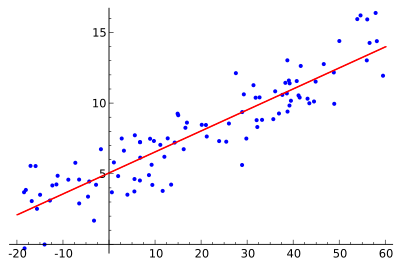

In [9]:
# import all nececssary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])
%matplotlib inline

In [29]:
# split the dataset into train and test set
data = pd.read_csv("diabetes.csv")
x = data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","DiabetesPedigreeFunction","Age","Outcome"]]
y = data[["BMI"]]
xTrain,xTest,yTrain,yTest = train_test_split(x,y, test_size=0.2, random_state=18)
xTrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
29,5,117,92,0,0,0.337,38,0
286,5,155,84,44,545,0.619,34,0
35,4,103,60,33,192,0.966,33,0
392,1,131,64,14,415,0.389,21,0
12,10,139,80,0,0,1.441,57,0


In [30]:
def extractfeatures(filename):
    x=np.genfromtxt(filename,delimiter=',')
    xfeatures=x[1:,1]
    y=x[1:,2]
    return xfeatures,y

def computeCost(X,y,theta):
    m=len(y)
    J=0#iterative solution
    s=0
    for i in range(0,m):
        s=s+((theta[0]+theta[1]*X[i,1])-y[i])**2
    J=s/(2*m)

    y=y.reshape(m,1)#vectorized solution
    J1=(np.dot((np.dot(X,theta)-y).T,(np.dot(X,theta)-y)))/(2*m)

    return J

def gradientDescent(X,y,theta,alpha,iterations):
    J_history=np.zeros((iterations,1))

    m=len(y)# number of training examples
    y=y.reshape(m,1)
    for iter in range(0,iterations):
        s1=0
        s0=0
        for i in range(0,m):
            s1+=((theta[0]+theta[1]*X[i,1])-y[i])*X[i,1]
            s0+=((theta[0]+theta[1]*X[i,1])-y[i])
        theta[0]=theta[0]-alpha*s0/m
        theta[1]=theta[1]-alpha*s1/m
        J_history[iter]=computeCost(X,y,theta)
    return theta,J_history

In [31]:
m = len(np.asarray(yTrain))

theta=np.ones((2,1))#initialize fitting parameters
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["Pregnancies"])]#Add a column of ones to X
iterations=100
alpha = 0.05

theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)#gets the final data and the values of cost function in each iteration

In [32]:
theta1,J_history[0:5]

(array([[28.5206753 ],
        [ 0.54992881]]),
 array([[240.38262916],
        [216.89788287],
        [207.60574119],
        [199.97610619],
        [192.7896451 ]]))

Text(0, 0.5, '$y$')

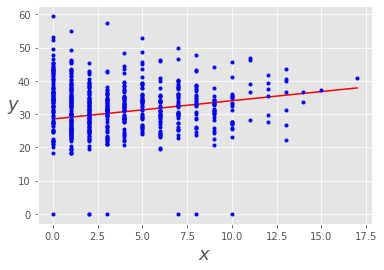

In [33]:
""" Let's plot the prediction line with the calculated theta"""

X_ln = np.array([min(np.asarray(xTrain["Pregnancies"])),max(np.asarray(xTrain["Pregnancies"]))]) #Plot a line between min x and max x
A_ln = np.c_[np.ones((2,1)),X_ln]
y_ln = A_ln.dot(theta1)

plt.figure(1)
plt.plot(X_ln,y_ln,'r-')
plt.plot(np.asarray(xTrain["Pregnancies"]),np.asarray(yTrain),'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([0,2,0,15])

In [10]:
# Train a Linear Regression model to predict "BMI" using all other features avaiable in the dataset
model = LinearRegression()
model.fit(xTrain,yTrain)
model.coef_

array([[ 0.02216954,  0.00639075, -0.00225108,  0.0003596 , -0.00030971,
         0.01068733,  0.11074043,  0.00279689]])

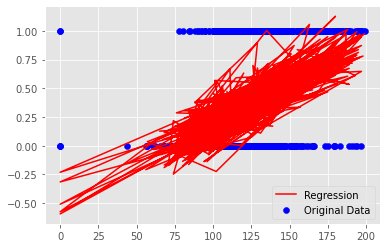

In [12]:
plt.scatter(x["Glucose"],y,color="blue",label="Original Data")
plt.plot(x["Glucose"],model.predict(x),color="red",label="Regression")
plt.legend(loc="best")

In [ ]:
# Plot the "cost function vs iterations" curve

In [ ]:
# perform greedy search to find optimal learning rate.  

In [1]:
# plot the "Predicted BMI value( 𝑌̂ 𝑖 )" vs "Actual BMI value( 𝑌𝑖 )" curve(it is a scatter plot)

In [ ]:
# perform PCA on the dataset and reduce the dimensionality to 2 and train a new model on these newly obtained features.

In [ ]:
# plot the "cost function vs iterations" curve for this new model.

In [ ]:
# plot the "Predicted BMI value( 𝑌̂ 𝑖 ) of the new model" vs "Actual BMI value( 𝑌𝑖 )" curve(it is a scatter plot)

In [1]:
# show the scatter plot of PCA generated new features and also show the linear regression curve that you got from new model.